<a href="https://colab.research.google.com/github/AnoVando/MSIS/blob/master/MSIS521_In_Class_Lab_2-15-2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import nltk
nltk.download('punkt') # tokenizer
nltk.download('wordnet') # lemmatizer
nltk.download('stopwords') # used to handle words like a, an, the
nltk.download('averaged_perceptron_tagger') # Part of Speech

d1 = "Yong is a good guy, he is not bad"
d2 = "feet wolves cooked boys girls ,!<@!"
d3 = "Yong is not a good guy, he is bad"

c1 = [d1, d2, d3] # list of documents

###TOKENIZE
token_d1 = nltk.word_tokenize(d1)
print(token_d1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
['Yong', 'is', 'a', 'good', 'guy', ',', 'he', 'is', 'not', 'bad']


In [0]:
tokenizer2 = nltk.tokenize.WhitespaceTokenizer()
token_d12 = tokenizer2.tokenize(d1)
print(token_d12)

['Yong', 'is', 'a', 'good', 'guy,', 'he', 'is', 'not', 'bad']


In [0]:
##BOW Frequency
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer()
vectorizer1.fit(c1)

print(vectorizer1.vocabulary_)

{'yong': 11, 'is': 8, 'good': 5, 'guy': 6, 'he': 7, 'not': 9, 'bad': 0, 'feet': 3, 'wolves': 10, 'cooked': 2, 'boys': 1, 'girls': 4}


In [0]:
v1 = vectorizer1.transform(c1)
print(v1.toarray())

[[1 0 0 0 0 1 1 1 2 1 0 1]
 [0 1 1 1 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 1 1 1 2 1 0 1]]


In [0]:
###STEMMER
token_d2 = nltk.word_tokenize(d2.lower())

stemmer = nltk.stem.PorterStemmer()
stemmered_token_d2 = [stemmer.stem(token) for token in token_d2 if token.isalpha()]

# more complete method for looping
# stemmed_token_d2 = []
# for token in token_d2:
#     if token.isalpha():
#         stemmed_token_d2.append(stemmer.stem(token))

print(token_d2)
print(stemmered_token_d2)

# LEMMATIZER
lemmatizer = nltk.stem.WordNetLemmatizer()
lemmatized_token_d2 = [lemmatizer.lemmatize(token) for token in token_d2 if token.isalpha()]
print(lemmatized_token_d2)

['feet', 'wolves', 'cooked', 'boys', 'girls', ',', '!', '<', '@', '!']
['feet', 'wolv', 'cook', 'boy', 'girl']
['foot', 'wolf', 'cooked', 'boy', 'girl']


In [0]:
###remove stop words
from nltk.corpus import stopwords

stop_words_removed = [token for token in token_d1 if not token in stopwords.words('english') if token.isalpha()]

# stop_words_removed = []
# for token in token_d1:
#     if token.isalpha():
#         if not in stopwords.words('englis'):
#             stop_words_removed.append(stopwords.words(token))           

print(token_d1)
print(stop_words_removed)

['Yong', 'is', 'a', 'good', 'guy', ',', 'he', 'is', 'not', 'bad']
['Yong', 'good', 'guy', 'bad']


In [0]:
### low frequency words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(min_df=2)
vectorizer1.fit(c1)
print(vectorizer1.vocabulary_)
v1 = vectorizer1.transform(c1)

print(v1.toarray())

{'yong': 6, 'is': 4, 'good': 1, 'guy': 2, 'he': 3, 'not': 5, 'bad': 0}
[[1 1 1 1 2 1 1]
 [0 0 0 0 0 0 0]
 [1 1 1 1 2 1 1]]


In [0]:
###TFI-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer()
vectorizer2.fit(c1)
print(vectorizer2.vocabulary_)

print('\n')

v2 = vectorizer2.transform(c1)
print(v2.toarray())

print('\n')

c2 = ["hello world", "Yong is calling"]
v_c2 = vectorizer2.transform(c2)
print(v_c2.toarray())

{'yong': 11, 'is': 8, 'good': 5, 'guy': 6, 'he': 7, 'not': 9, 'bad': 0, 'feet': 3, 'wolves': 10, 'cooked': 2, 'boys': 1, 'girls': 4}


[[0.31622777 0.         0.         0.         0.         0.31622777
  0.31622777 0.31622777 0.63245553 0.31622777 0.         0.31622777]
 [0.         0.4472136  0.4472136  0.4472136  0.4472136  0.
  0.         0.         0.         0.         0.4472136  0.        ]
 [0.31622777 0.         0.         0.         0.         0.31622777
  0.31622777 0.31622777 0.63245553 0.31622777 0.         0.31622777]]


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.70710678 0.         0.         0.70710678]]


In [0]:
### Bag of 2-grams
vectorizer3 = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
vectorizer3.fit(c1)
v3 = vectorizer3.transform(c1)

print(v3.toarray())
print('\n')
print(vectorizer3.vocabulary_)

[[0.25819889 0.25819889 0.25819889 0.25819889 0.25819889 0.25819889
  0.25819889 0.51639778 0.25819889 0.25819889 0.25819889 0.25819889]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.25819889 0.25819889 0.25819889 0.25819889 0.25819889 0.25819889
  0.25819889 0.51639778 0.25819889 0.25819889 0.25819889 0.25819889]]


{'yong': 10, 'is': 7, 'good': 1, 'guy': 3, 'he': 5, 'not': 9, 'bad': 0, 'yong is': 11, 'good guy': 2, 'guy he': 4, 'he is': 6, 'is not': 8}


In [0]:
### Part of Speech TAG
d4 = "I drink water in parties"
d5 = "I grab a drink in parties"
token4 = nltk.word_tokenize(d4)

POS_token4 = nltk.pos_tag(token4)

print(POS_token4)
print('\n')

c2 = [d4, d5]
POS_c2 = []
for doc in c2:
    token_doc = nltk.word_tokenize(doc) # tokenize the words
    POS_token_doc = nltk.pos_tag(token_doc) # pos tag the tokens
    POS_token_temp = []
    for i in POS_token_doc:
        POS_token_temp.append(i[0] + i[1]) # create tuples for the tokens/pos tags
    POS_c2.append(" ".join(POS_token_temp))

vectorizer4 = TfidfVectorizer()
vectorizer4.fit(POS_c2)
print(vectorizer4.vocabulary_)

print('\n')

POS_v3 = vectorizer4.transform(POS_c2)
print(POS_v3.toarray())

[('I', 'PRP'), ('drink', 'VBP'), ('water', 'NN'), ('in', 'IN'), ('parties', 'NNS')]


{'iprp': 5, 'drinkvbp': 2, 'waternn': 7, 'inin': 4, 'partiesnns': 6, 'grabvbp': 3, 'adt': 0, 'drinknn': 1}


[[0.         0.         0.53309782 0.         0.37930349 0.37930349
  0.37930349 0.53309782]
 [0.47042643 0.47042643 0.         0.47042643 0.33471228 0.33471228
  0.33471228 0.        ]]


In [0]:
## Image Manipulation
# Most images have 3 dimensions (red, green and blue intensity values), but some will have a 4th which is for transparency

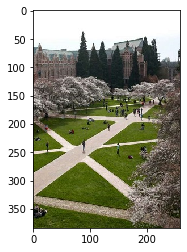

In [4]:
from PIL import Image
from pylab import *

##image manipulation
im = Image.open('uw.png')
imshow(im)

In [0]:
im_m = array(im)

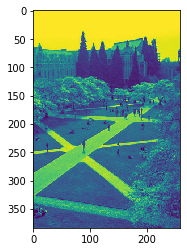

In [11]:
im_grey_m = array(im.convert('L'))
imshow(im_grey_m)

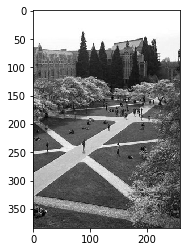

In [12]:
im_1 = im.convert('LA')
imshow(im_1)

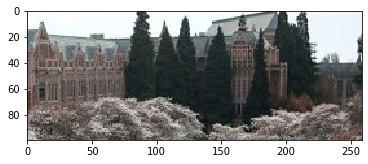

In [16]:
im_c = im_m[50:150,:,:]
imshow(im_c)

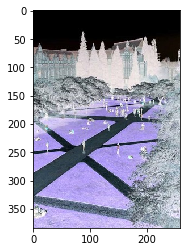

In [17]:
im_n = 255 - im_m[:,:,:-1]
imshow(im_n)

(array([  378.,   392.,   297.,   448.,   273.,   280.,   317.,   350.,
          359.,   418.,   408.,   418.,   370.,   448.,   453.,   416.,
          436.,   436.,     0.,   470.,   433.,   468.,   433.,   479.,
            0.,   521.,   488.,   464.,   485.,     0.,   533.,   510.,
          499.,     0.,   584.,   544.,     0.,   610.,   620.,     0.,
          569.,     0.,   598.,   613.,     0.,   680.,     0.,   680.,
          660.,     0.,   659.,     0.,   682.,     0.,   756.,     0.,
          753.,     0.,   754.,     0.,   755.,     0.,   837.,     0.,
          778.,     0.,   807.,     0.,   873.,     0.,   836.,     0.,
            0.,   923.,     0.,   914.,     0.,     0.,   945.,     0.,
          985.,     0.,     0.,   974.,     0.,   996.,     0.,     0.,
          982.,     0.,     0.,  1052.,     0.,  1049.,     0.,     0.,
         1059.,     0.,     0.,  1008.,     0.,     0.,  1102.,     0.,
         1031.,     0.,     0.,  1090.,     0.,     0.,  1056., 

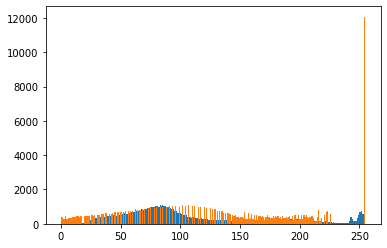

In [26]:
figure()
hist(im_grey_m.flatten(), 256)
hist(im2.flatten(), 256)

In [0]:
## Normalization
imhist, bins = histogram(im_grey_m.flatten(), 256, density=True)
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1] # Normalization to ensure that we are in [0,255]
im2 = interp(im_grey_m.flatten(), bins[:-1], cdf) # interpolation function to figure out middlerange values
im_norm = im2.reshape(im_grey_m.shape) # reverse flattening

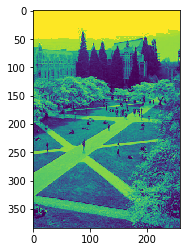

In [28]:
imshow(im_norm)

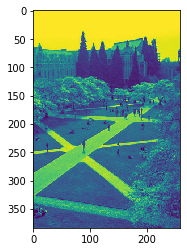

In [29]:
imshow(im_grey_m)

In [0]:
# Source Text

from PIL import Image
from pylab import *

##image manipulation
im = Image.open('uw.png')

crop = (75,100,180,150)
im_crop = im.crop(crop)
im_rs = im.resize((100,100))
im_rotate = im.rotate(180)

print(im)
print(im_crop)
print(im_rs)
print(im_rotate)

imshow(im)
imshow(im_crop)
imshow(im_rs)
imshow(im_rotate)

##math representation
im_m = array(im)
im_grey_m = array(im.convert('L'))
im_v = im_m.flatten()

print(im_m)
print(im_grey_m)
print(im_v)

im_m.shape
im_v.shape
im_grey_m.shape

im_4 = im_m[:,:,3]
imshow(im_4)

im_s = im_m[20:60,:,:]
imshow(im_s)

im_i = 255 - im_m[:,:,:-1]
imshow(im_i)

im_3d = im_m[:,:,:-1]
imshow(im_3d)

figure()
hist(im_v,256)

 
##normalization
imhist,bins = histogram(im_grey_m.flatten(), 256, density=True)
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1]
im2 = interp(im_grey_m.flatten(), bins[:-1], cdf)
im_norm = im2.reshape(im_grey_m.shape)

##display
imshow(im_norm)
imshow(im_grey_m)

figure()
hist(im_grey_m.flatten(),256)
hist(im2.flatten(),256)



SyntaxError: ignored